

# Project: Investigating TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


> In this project we're intrested in analzing TMDb movie dataset which is a dataset with more than 10000 inctances and 21 feature, it has plenty of information that can help with finding intersting pattrens and relationships between diffrent features.

>We're interested here in analyzing this dataset in order to answer these questions:-
1. What are the best years for movies?
 1. In which year most of the movies have been produced?
 2. What are the years with the most movie revenue?
4. Does a high vote average necessarily mean a more popular movie?
5. Who are the top directors with the highest vote average?
6. Which are the genres with the higher vote average?



In [7]:
#Import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
df = pd.read_csv('tmdb-movies.csv')



<a id='wrangling'></a>
## Data Wrangling


### General Properties



Loading the dataset.

In [8]:
#Loal the dataset
df = pd.read_csv('tmdb-movies.csv')

To explore the 10 first records of the dataset.

In [9]:
#Display the head rows of the dataset
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


To check the data types and if there's any missing data.
The dataset has many missing data in many columns, but considering the feature selection that we're going to perform there is missing data in director, cast, genres which is going to be dropped. 


In [10]:
#View information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

To check how many duplicates on the dataset.                              

In [11]:
#Check if there is any duplicates
sum(df.duplicated())

1

 General statistical information.                            


In [12]:
#Basic statistics
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Exploring numerical features with visuals.

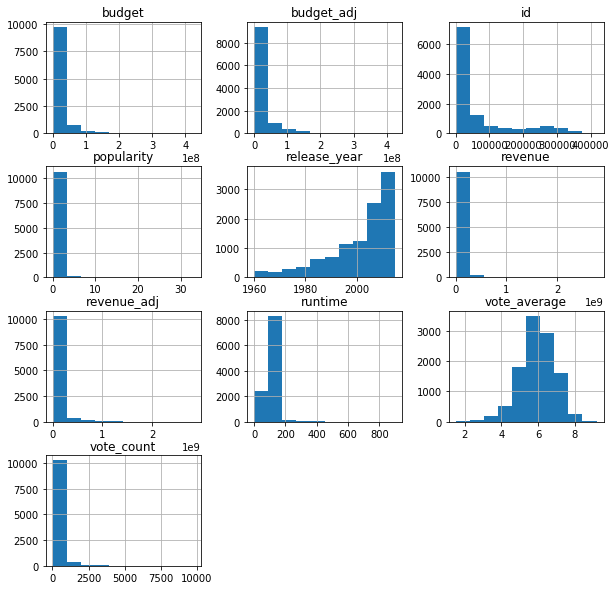

In [13]:
#Plot histogram
df.hist(figsize = (10, 10));



### Data Cleaning

Feature selection. Dropping unused columns.


In [14]:
#Drop unused columns
df.drop(['production_companies', 'overview', 'tagline', 'homepage', 'keywords'], axis=1, inplace=True)

Converting zeros to NaN.

In [15]:
#To convert zero to NaN
cols = ["budget","revenue","budget_adj","revenue_adj"]
df[cols] = df[cols].replace({0:np.nan})

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
id                10866 non-null int64
imdb_id           10856 non-null object
popularity        10866 non-null float64
budget            5170 non-null float64
revenue           4850 non-null float64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        5170 non-null float64
revenue_adj       4850 non-null float64
dtypes: float64(6), int64(4), object(6)
memory usage: 1.3+ MB


Dropping records with missing data.

In [17]:
#To drop missing data
df.dropna(inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3850 entries, 0 to 10848
Data columns (total 16 columns):
id                3850 non-null int64
imdb_id           3850 non-null object
popularity        3850 non-null float64
budget            3850 non-null float64
revenue           3850 non-null float64
original_title    3850 non-null object
cast              3850 non-null object
director          3850 non-null object
runtime           3850 non-null int64
genres            3850 non-null object
release_date      3850 non-null object
vote_count        3850 non-null int64
vote_average      3850 non-null float64
release_year      3850 non-null int64
budget_adj        3850 non-null float64
revenue_adj       3850 non-null float64
dtypes: float64(6), int64(4), object(6)
memory usage: 511.3+ KB


Dropping duplicated recordes.

In [19]:
#To drop duplicates
df.drop_duplicates()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000.0,5.329505e+08,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000.0,4.406035e+08,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000.0,5.953803e+08,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000.0,1.156731e+09,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000.0,8.537086e+08,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,Comedy|Animation|Family,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### What are the best years for movies?

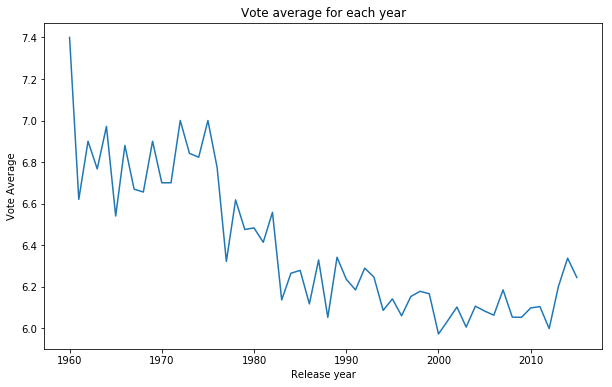

In [20]:
#Plot line chart 
df.groupby(['release_year'])['vote_average'].mean().plot(kind='line', figsize=(10, 6))
plt.xlabel("Release year")
plt.ylabel("Vote Average")
plt.title("Vote average for each year")
plt.show()

1960 has the highest vote average with 7.4.

#### In which year most of the movies have been produced?

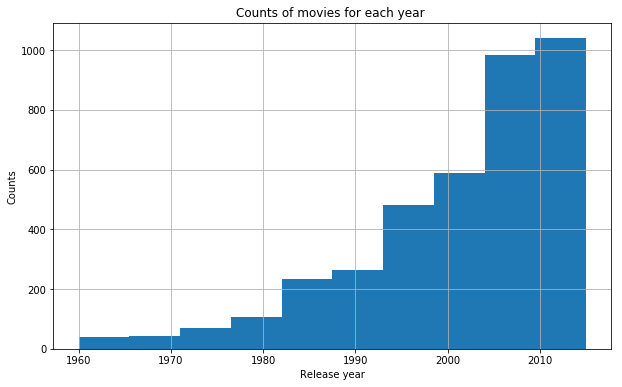

In [21]:
#plot histogram
df['release_year'].hist(figsize=(10, 6))
plt.xlabel("Release year")
plt.ylabel("Counts")
plt.title("Counts of movies for each year ")
plt.show();

Most of the movies were produced between late 2000’s until 2015. 

#### What are the years with the most movie revenue?


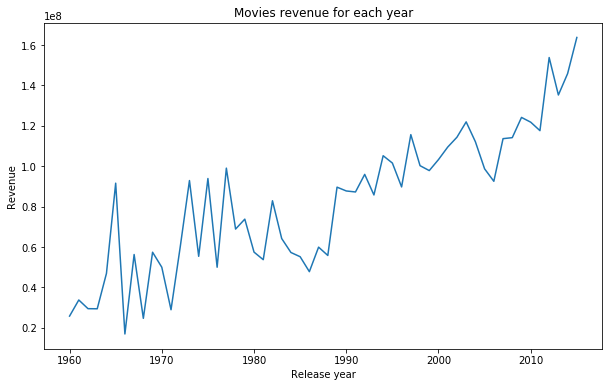

In [22]:
#Plot line chart
df.groupby(['release_year'])['revenue'].mean().plot(kind='line', figsize=(10, 6))
plt.xlabel("Release year")
plt.ylabel("Revenue")
plt.title("Movies revenue for each year")
plt.show();

The 80's and 2010’s have the highest revenue. 

### Does a high vote average necessarily mean a more popular movie?


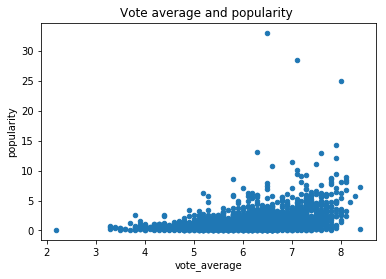

In [23]:
#Plot scatterplot
df.plot.scatter(x="vote_average", y="popularity")
plt.title("Vote average and popularity ")
plt.show();

There’s a weak relationship between vote average and popularity. 

### Who are the top 10 directors with the highest vote average?


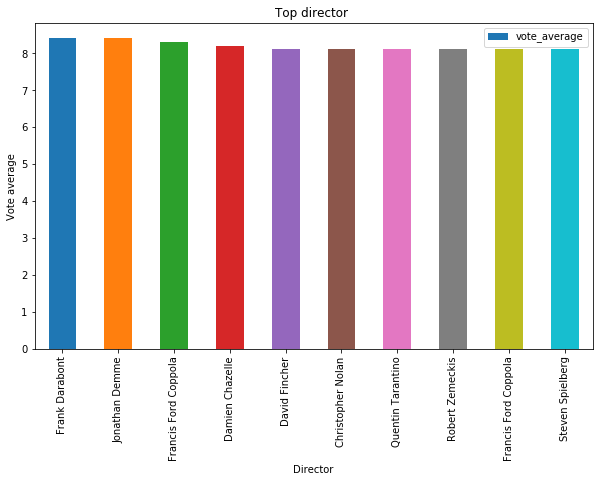

In [24]:
#plot bar chart forr top 10 directors
GG = df.nlargest(10, 'vote_average')
GG.plot.bar(x="director", y="vote_average", figsize=(10, 6))
plt.xlabel("Director")
plt.ylabel("Vote average")
plt.title("Top director ")
plt.show();

### Which are the genres with the higher vote average?

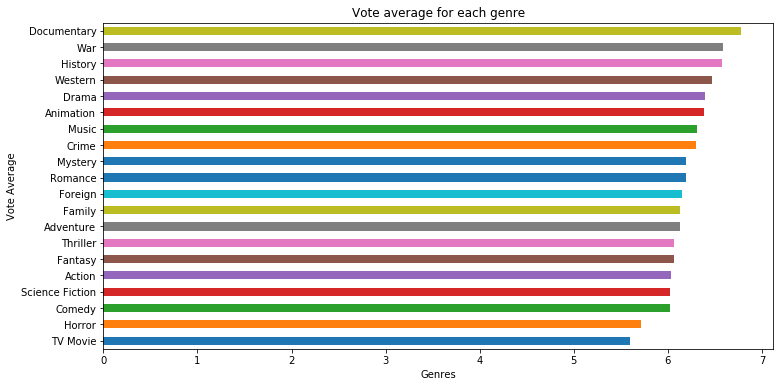

In [25]:
#splitting multiple values in different cells
#plot bar chart
new_df = (df.drop('genres', axis=1).join(df['genres']
        .str.split('|', expand=True).stack()
        .reset_index(level=1, drop=True).rename('genres')).loc[:, df.columns])

new_df.groupby(['genres'])['vote_average'].mean().sort_values().plot(kind='barh', figsize=(12, 6))
 
plt.xlabel("Genres")
plt.ylabel("Vote Average")
plt.title("Vote average for each genre")
plt.show()


The genres with highest vote average are Documentary, War, History. 


<a id='conclusions'></a>
## Conclusions


>In conclusion, we have discovered many valuable information from this analysis and we answered the research questions. 
>The first three questions were directly related to the release date, we can see that there's a decreasing trend for the vote average and the best vote average of movies starts from 1960 till mid 1970’s. The 2000’s to 2010’s wasn’t the years for movie voters but it started increasing in 2015. 
>Then, we can see that the production of movies is increasing every year and from late 2010’s till 2015 is its highest. 
>The last chart visualizes movie revenue over years. It's an increasing trend, but some years like the 80’s and 2000’s no increase was observed. Highest revenue was in mid 2010’s. 

> The last three research questions examine the vote average relationship with different variables. The popular more movie doesn't necessarily mean a higher vote average. 
>The top voted movies directed by:-
- Frank Darabont
- Jonathan Demme
- Francis Ford Coppola
- Damien Chazelle
- David Fincher
- Christopher Nolan
- Quentin Tarantino
- Robert Zemeckis
- Steven Spielberg

> The genres with highest vote average are Documentary, War, History. On the other hand, it’s surprising to know that comedy and horror movies from the three genres!

## Limitations 
The biggest limitation in the dataset that it has many missing cells especially in budget, revenue, budget_adj, revenue_adj columns, the missing cells was more than rest and wouldn't be very sufficient to fill it with mean. Also there’s some external factors affecting the results of the analysis, the inflation for example has an effect on the revenue of movies. 




## References
- https://stackoverflow.com/questions/45416684/python-pandas-replace-multiple-columns-zero-to-nan
- https://gist.github.com/sureshsarda/00c3b7423ea7b6cba4250a719d6b7424

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0